In [178]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [179]:
train = pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\greenAI\day-11\newfile\DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')
test = pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\greenAI\day-11\newfile\DailyDelhiClimateTest.csv")

In [180]:
train.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [181]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [182]:
#perform head tail describe and preprocessing steps on this dataset
train.tail()



,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [183]:
train.describe()


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [184]:
train.isnull().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [185]:
# The 'date' column is already set as the index and is in datetime format for 'train'.
# No further action is needed here.

In [186]:
train['day'] = train.index.day
train['month'] = train.index.month
train['year'] = train.index.year
# Note: date is already set as index from earlier data loading


In [187]:
# Converting date to datetime format
test['date'] = pd.to_datetime(test['date'])
# Set date as index
test.set_index('date', inplace=True)
# Extract day and month features
test['day'] = test.index.day
test['month'] = test.index.month
test['year'] = test.index.year

In [188]:
#display train and test data
train.head()
test.head()

,meantemp,humidity,wind_speed,meanpressure,day,month,year
date,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,1,1,2017
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,1,2017
2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,1,2017
2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,1,2017
2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,1,2017


In [189]:
# Concatenate the train and test data
data = pd.concat([train, test], axis=0)
# Since date is already the index, we don't need to drop it again
data.head()


,meantemp,humidity,wind_speed,meanpressure,day,month,year
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,3,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,4,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,5,1,2013


In [190]:
import plotly.graph_objects as go


In [191]:
fig_temp = go.Figure()
fig_temp.add_trace(go.Scatter(x = data.index, y = data['meantemp'], mode='lines', name='Mean Temperature'))
fig_temp.update_layout(
    title='Mean Temperature Over Time',
    xaxis_title='Date',
    yaxis_title='Mean Temperature (°C)',
)

In [192]:
#display mode = 9
fig_temp.show()

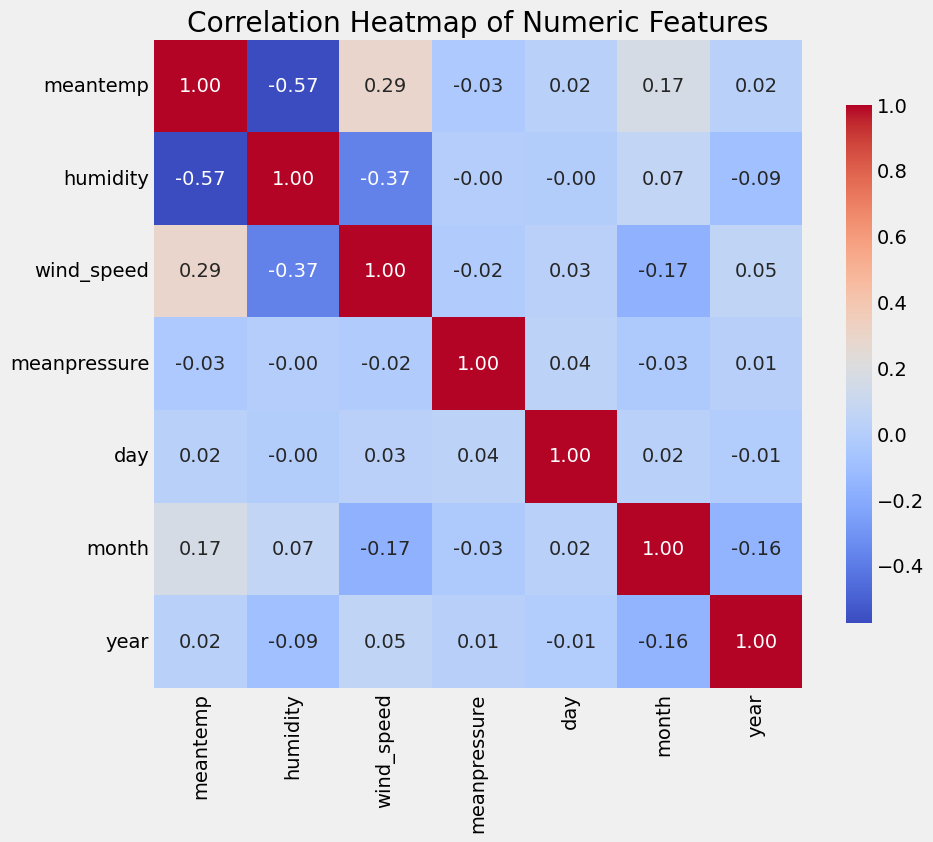

In [193]:
numeric_df = data.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Set the figure size
plt.figure(figsize=(10, 8))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [194]:
numeric_df = numeric_df.drop(columns=['day', 'month', 'year'], axis=1, errors='ignore')

corr = numeric_df.corr()

<Axes: >

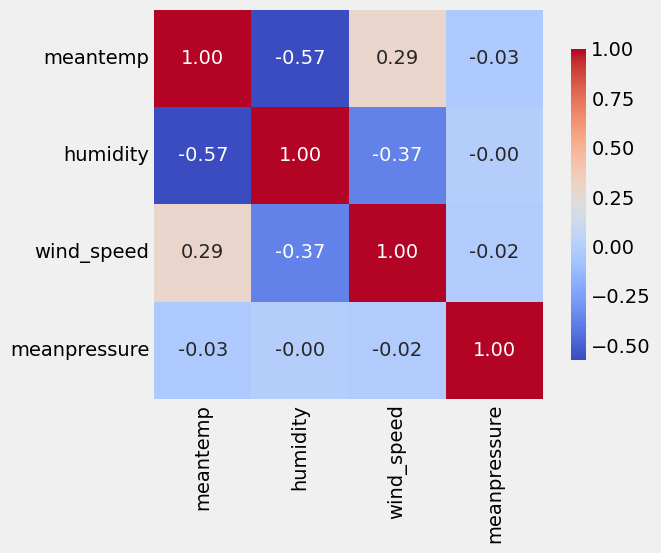

In [195]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})


In [196]:
#ned to analyze the heatmap and tell us which features are highly important to determine the temperature of the next 30 days
important_features = corr['meantemp'].abs().sort_values(ascending=False).head(3)
print("Top 10 features highly correlated with 'meantemp':")
print(important_features)


Top 10 features highly correlated with 'meantemp':
meantemp      1.000000
humidity      0.574849
wind_speed    0.288088
Name: meantemp, dtype: float64


In [197]:
#create a dataframe named climate_df
climate_df = data[['meantemp', 'humidity', 'wind_speed', 'month', 'meanpressure', 'day', 'year']].copy()
climate_df.head()

,meantemp,humidity,wind_speed,month,meanpressure,day,year
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1,1017.800000,2,2013
2013-01-03,7.166667,87.000000,4.633333,1,1018.666667,3,2013
2013-01-04,8.666667,71.333333,1.233333,1,1017.166667,4,2013
2013-01-05,6.000000,86.833333,3.700000,1,1016.500000,5,2013


In [198]:
import plotly.express as px
figure = px.scatter(climate_df, x='meantemp', y='humidity', size='meantemp', trendline='ols', title='Humidity vs Mean Temperature')
figure

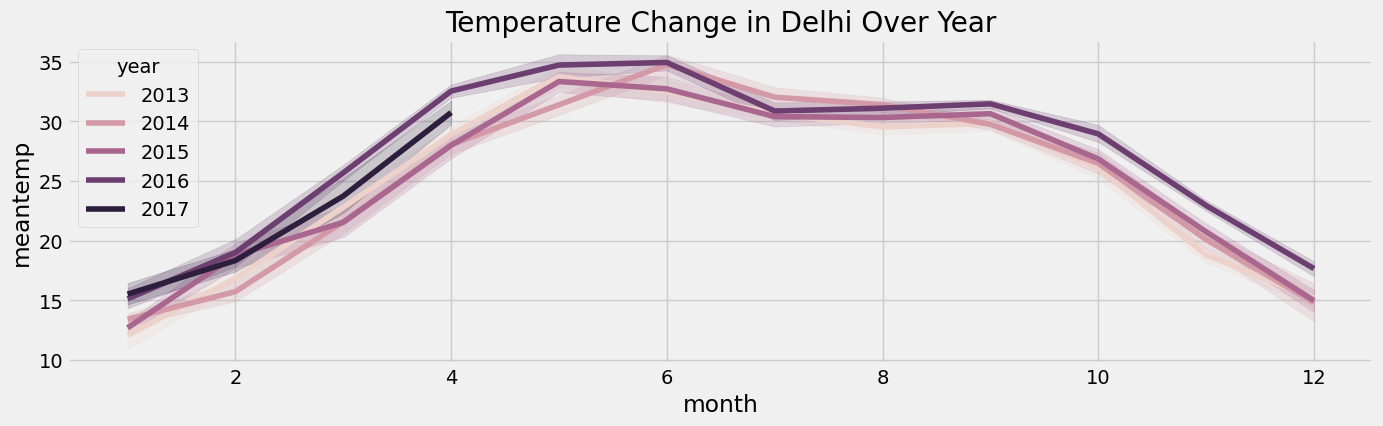

In [199]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 4))
plt.title("Temperature Change in Delhi Over Year")
sns.lineplot(climate_df, x = 'month', y = 'meantemp', hue='year')
plt.show()

In [200]:
new_df = climate_df.drop(['date', 'month', 'year', 'day'], axis=1, errors='ignore')

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(new_df, test_size=0.2, random_state=42)

In [202]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
#parameters
length = 12
stride = 1

data2 = []
target = []

for i in range(0,len(X_train_scaled) - length +1, stride):
    data2.append(X_train_scaled[i:i+length])
    target.append(X_train_scaled[i+length-1])

data2 = np.array(data2)
target = np.array(target) 

In [204]:
data2.shape, target.shape

((1249, 12, 4), (1249, 4))

In [205]:
#train the rnn model
n_features = X_train_scaled.shape[1]


In [206]:
n_features

4

In [207]:
model = Sequential()
model.add(SimpleRNN(units = 128, activation='tanh', input_shape=(length, n_features)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 128)               17024     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

Epoch 1/100
32/32 [==============================] - 2s 14ms/step - loss: 0.2114 - val_loss: 0.0711
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1014 - val_loss: 0.0666
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0879 - val_loss: 0.0644
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0812 - val_loss: 0.0646
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0789 - val_loss: 0.0639
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0762 - val_loss: 0.0637
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0748 - val_loss: 0.0636
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0737 - val_loss: 0.0636
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0725 - val_loss: 0.0635
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0722 - val_loss: 0.0636
Epoch 11

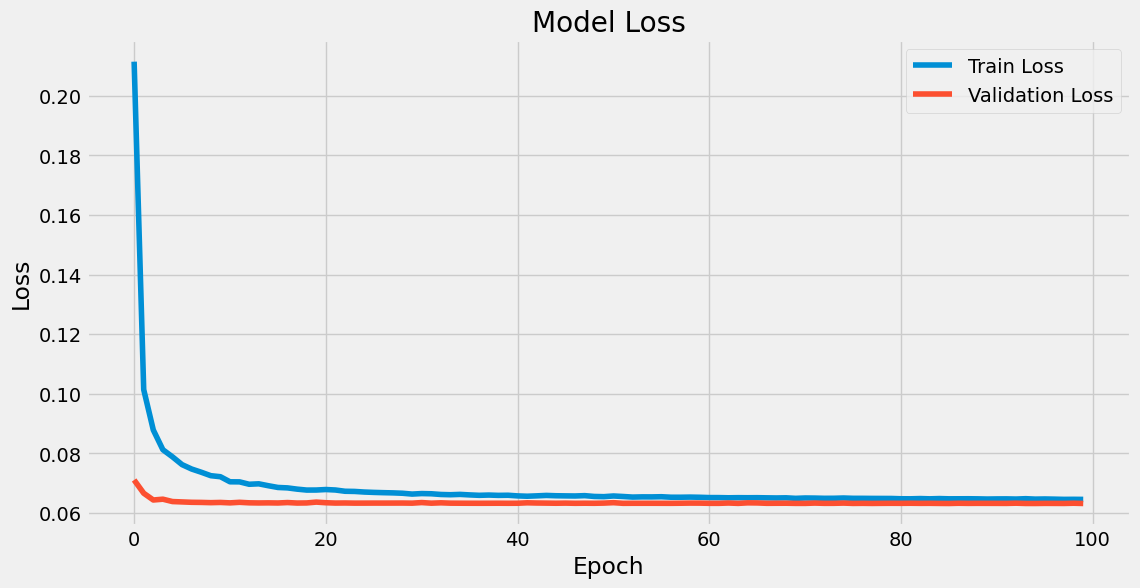

In [208]:
#fit the model
history = model.fit(data2, target, epochs=100, batch_size=32, validation_split=0.2)
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()